#### Imports

In [19]:
from pathlib import Path
from Dataset import Dataset
from Route import Route
import matplotlib.pyplot as plt
import numpy as np
import logging

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
)
logger = logging.getLogger("TCC")

# Exploring Solomon Benchmark

## Comprehending diferences between datasets

2026-02-02 21:10:18,818 [INFO] C101 - Average Time Window: 72.40
2026-02-02 21:10:18,818 [INFO] R101 - Average Time Window: 12.18
2026-02-02 21:10:18,818 [INFO] RC101 - Average Time Window: 32.08
2026-02-02 21:10:18,818 [INFO] RC201 - Average Time Window: 128.32


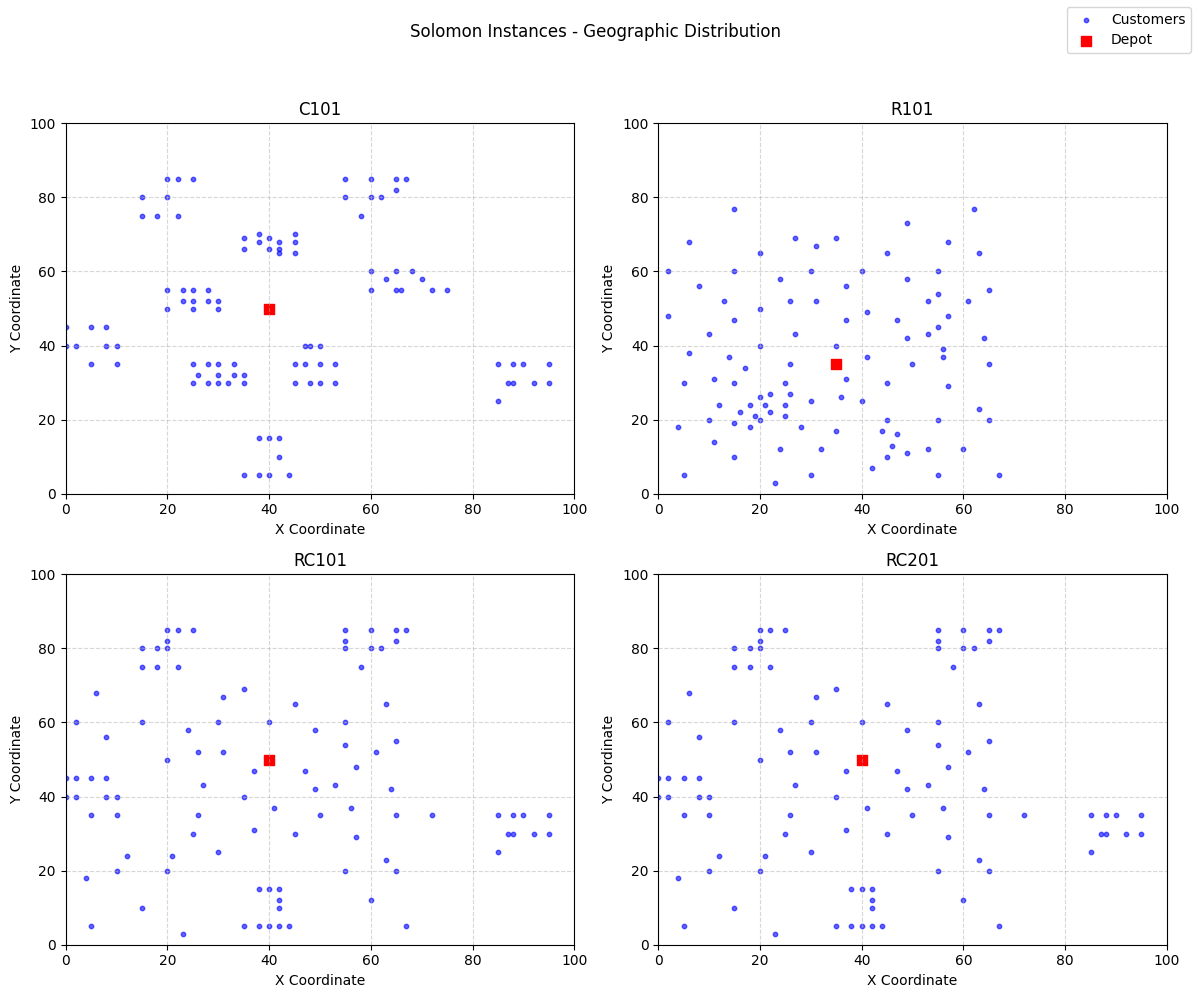

In [20]:
# type hints for better readability and IDE support
axes: np.ndarray
ax: plt.Axes

paths = [
    "Datasets/C101.txt",
    "Datasets/R101.txt",
    "Datasets/RC101.txt",
    "Datasets/RC201.txt",
]

datasets = [Dataset(Path(p)) for p in paths]

avg_window_times = [
    (ds.customers_df['due_date'] - ds.customers_df['ready_time']).mean()
    for ds in datasets
 ]

for ds, avg_time in zip(datasets, avg_window_times):
    logger.info(f"{ds.name} - Average Time Window: {avg_time:.2f}")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for ax, ds in zip(axes, datasets):
    ax.scatter(ds.customers_df.x[1:], ds.customers_df.y[1:], c='blue', label='Customers', alpha=0.6, s=10)
    ax.scatter(ds.customers_df.x[0], ds.customers_df.y[0], c='red', marker='s', s=60, label='Depot')
    ax.set_title(ds.name)
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.grid(True, linestyle='--', alpha=0.5)

for ax in axes[len(datasets):]:
    ax.axis("off")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
fig.suptitle("Solomon Instances - Geographic Distribution")
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Testing base code
Validations for cost function, vizualization methods

2026-02-02 21:14:29,781 [INFO] Number of routes in solution: 4
2026-02-02 21:14:29,782 [INFO] Total distance (cost): 1406.94
2026-02-02 21:14:29,783 [INFO] The total cost matches the expected values from literature.


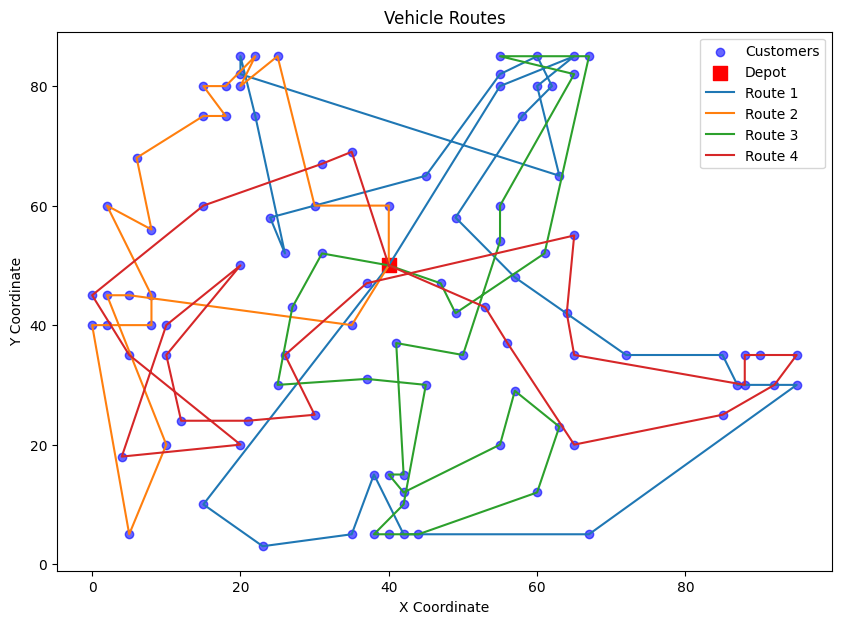

In [ ]:
# Read solution and plot routes with cost
solution_path = Path("Solutions/rc201.txt")
dataset_path = Path("Datasets/rc201.txt")

ds = Dataset(dataset_path)
route = Route(dataset=ds)
route.read_solution(solution_path, include_depot=True)

total_cost = route.get_total_distance()
num_subroutes = route.num_subroutes()
logger.info(f"Number of routes in solution: {num_subroutes}")
logger.info(f"Total distance (cost): {total_cost:.2f}")

if (round(total_cost, 2) == 1406.94) and (num_subroutes == 4):
    logger.info("The total cost matches the expected values from literature.")
    # NOTE: This is a validation check to ensure the solution's cost is as expected
    # Check value from literature here: https://www.sintef.no/projectweb/top/vrptw/100-customers/

route.plot_routes()

# Metaheuristics 